In [208]:
import numpy as np
import matplotlib.pyplot as plt

In [209]:
import tensorflow as tf
from tensorflow import keras

In [210]:
#데이터 불러오기

In [211]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [212]:
train_datagen = ImageDataGenerator(rescale=1/255.)

In [213]:
train_generator = train_datagen.flow_from_directory(
    'check_car_status/train',
    target_size=(100,100),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 444 images belonging to 2 classes.


In [214]:
for i, (data_batch, labels_batch) in enumerate(train_generator):
    print(i, data_batch.shape, labels_batch.shape)
    print(labels_batch)
    break

0 (20, 100, 100, 3) (20,)
[1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.]


In [215]:
img = data_batch[0]
img.shape, img.dtype, img.max(), img.min()

((100, 100, 3), dtype('float32'), 1.0, 0.0)

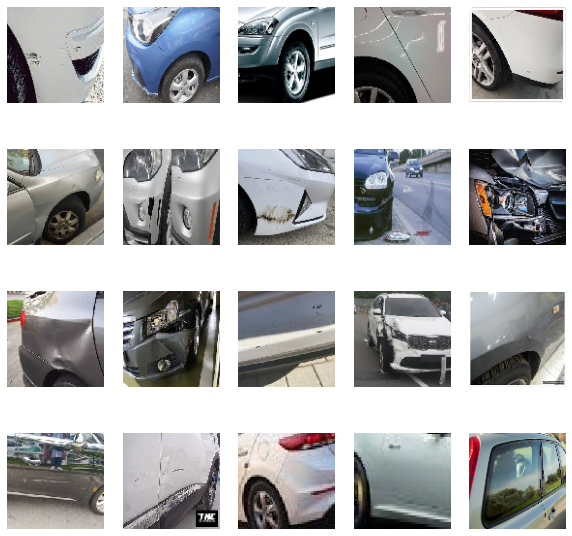

In [216]:
plt.figure(figsize=[10,10])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data_batch[i])
    plt.axis('off')

In [217]:
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [218]:
validation_generator = validation_datagen.flow_from_directory(
    'check_car_status/validation',
    target_size=(100,100),
    batch_size=20,
    shuffle=True, # default is True
    class_mode='binary') # categorical, sparse(정수레이블), binary, input(입력이미지)

Found 200 images belonging to 2 classes.


In [ ]:
###

In [219]:
#CNN적용

In [220]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(100,100,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 25, 25, 64)       

In [221]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [222]:
#훈련데이터 400, 검증데이터 200장 , 테스트 데이터 20장
history = model.fit_generator(train_generator, epochs=40, steps_per_epoch=20, #총  훈련 데이터 200개를 20장씩  10번 할 수있기에
                validation_data=validation_generator, validation_steps=10) 
#epotch(batchsize)를 20으로 두었기 때문에 20장씩  100장을 5번 돌릴 수 있기에

Epoch 1/40


C:\Users\gnos4\AppData\Local\Temp\ipykernel_17432\2217455364.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=40, steps_per_epoch=20, #총  훈련 데이터 200개를 20장씩  10번 할 수있기에


20/20 [==============================] - 4s 185ms/step - loss: 0.7128 - acc: 0.4870 - val_loss: 0.6966 - val_acc: 0.5000
Epoch 2/40
20/20 [==============================] - 4s 178ms/step - loss: 0.6971 - acc: 0.5130 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 3/40
20/20 [==============================] - 4s 174ms/step - loss: 0.6955 - acc: 0.4974 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 4/40
20/20 [==============================] - 3s 174ms/step - loss: 0.6935 - acc: 0.4818 - val_loss: 0.6919 - val_acc: 0.5000
Epoch 5/40
20/20 [==============================] - 3s 172ms/step - loss: 0.6781 - acc: 0.5625 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 6/40
20/20 [==============================] - 3s 172ms/step - loss: 0.6920 - acc: 0.5339 - val_loss: 0.6886 - val_acc: 0.5700
Epoch 7/40
20/20 [==============================] - 3s 171ms/step - loss: 0.6835 - acc: 0.5182 - val_loss: 0.6919 - val_acc: 0.5100
Epoch 8/40
20/20 [==============================] - 4s 177ms/step - loss: 0.6809 - acc:

In [223]:
# #훈련데이터 400, 검증데이터 200장 , 테스트 데이터 20장
# history = model.fit_generator(train_generator, epochs=40, steps_per_epoch=20, #총  훈련 데이터 400개를 20장씩  20번 할 수있기에
#                 validation_data=validation_generator, validation_steps=5) 
# #epotch(batchsize)를 20으로 두었기 때문에 20장씩  100장을 5번 돌릴 수 있기에

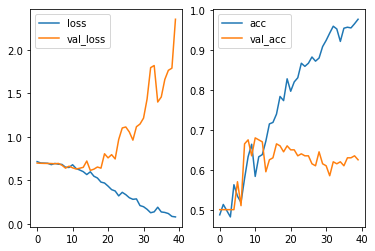

In [224]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [ ]:
#<왼쪽>
#주황색 : 오차값
#파란색 : 실제값

#<오른쪽>
#파란색 : 정확도
#주황색 : 오차




# - loss : 훈련 손실값- acc : 훈련 정확도- val_loss : 검증 손실값- val_acc : 검증 정확도


In [225]:
# #상황1
# #검증 데이터 20장을  가지고 와서 어떤게 잘 맞추었는지 어떤게 못 맞추었는지 확이 하기 위한 작업
# #확인을 통해 어떤 사진을 데이터로 사용해야 달 맞추는지 알기 위한 자료
# #check_car_status/train 파일 경로???
# images = []
# for i  in  range(10):
#     image = skimage.io.imread(f'train/clear/{i}.jpg')
#     image = skimage.transform.resize(image, (100,100))
#     images.append(image)
# for i  in  range(10):
#     image = skimage.io.imread(f'train/crash/{i}.jpg')
#     image = skimage.transform.resize(image, (100,100))
#     images.append(image)
#     #사이즈를 위에서 정한 100*100으로 해준다
#     #각각 해당 경로의 파일에 경로를 알려주고 파일명을 통일 시켜 배열에 넣어준다
# X_test = np.array(images)/255  #255로 나누는 이유는 0과 1로 만들어 주기 위해서 이다.
# X_test.shape # (20, 100, 100, 3)

In [226]:
import skimage

In [227]:
#검증 데이터 20장을  가지고 와서 어떤게 잘 맞추었는지 어떤게 못 맞추었는지 확이 하기 위한 작업
#확인을 통해 어떤 사진을 데이터로 사용해야 달 맞추는지 알기 위한 자료
#check_car_status/train 파일 경로???

images = []
for i in  range(10):
    image = skimage.io.imread(f'check_car_status/test/clear/{i}.jpg')
    image = skimage.transform.resize(image, (100,100))
    images.append(image)
    print(image.shape)
for i  in  range(10):
    image = skimage.io.imread(f'check_car_status/test/crash/{i}.jpg')
    image = skimage.transform.resize(image, (100,100))
    images.append(image)
    print(image.shape)
    
    #사이즈를 위에서 정한 100*100으로 해준다
    #각각 해당 경로의 파일에 경로를 알려주고 파일명을 통일 시켜 배열에 넣어준다
X_test = np.array(images)/255                      #255로 나누는 이유는 0과 1로 만들어 주기 위해서 이다.
#X_test.shape                                       # (20, 100, 100, 3)
X_test.shape # (20, 100, 100, 3)    

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)


(20, 100, 100, 3)

In [228]:
#실제 y값을 구하고 이값이 컴퓨터가 맞추었는지 못 맞추었는지 0,1로 나오는 값을 보고 판단
y = np.array([0]*10 + [1]*10) #[0]첫번째 배열에는 clear한 사진 열장이 들어 있고, [1]번에는 crash한 사진이 열장 들어 있다.
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [229]:
#예측 값이 맞았는지 틀렸는지 0,1,로 나오는 값을 보고 판단 
y_pred = model.predict(X_test)
y_pred.ravel()

1/1 [==============================] - 0s 127ms/step


array([0.08326799, 0.11040023, 0.07826801, 0.09275614, 0.06820097,
       0.08793834, 0.07683523, 0.10774663, 0.07609408, 0.10105223,
       0.06767384, 0.09443615, 0.07910281, 0.08372797, 0.08432703,
       0.1056053 , 0.10118613, 0.07040132, 0.09942437, 0.10382092],
      dtype=float32)

In [ ]:
#위의 두값을 보면서 0이었던게 1이되었는지 0이 었던게 1이 되었는지를 보면서 맞추었는지 틀렸는지 보고 해당 사진을 찾아 왜
#이사진은 맞추었고 또 어떤 사진은 못 맞추었는지 확인하는 하고 특징을 유추 하기 위한 코드